# Adaptive Variational Quantum Dynamics of Heisenberg model

In [1]:
import numpy as np
import os
import sys
import time
from model import zzxzmodel
from model import heis
from ansatz import ansatz
from avaridyn import avaridynIsing
from avaridyn import avaridynHeis
from ansatz import generate_op_pools
from qiskit import QuantumCircuit, QuantumRegister, execute
from qiskit.opflow import Zero, One, I, X, Y, Z

## The initial setup

In [3]:
N=3 # The system size


start = time.time() 


nsite = N

# init_state = ([state for supersposition],[phase]) : phase e^(i\phi)
init_state_1 = ([0,4,6,7],[1,1,1,1]) #Create initial state 0-> [down,down,down], 1-> [up,down,down].....

# Make initial state at ref_state at t=0
ref_state = np.zeros((2**nsite),dtype=complex)

if len(init_state_1[0])==1:
    
    ref_state[init_state_1[0][0]] = 1
    
else:
    
    for i in range(len(init_state_1[0])):
        
        ref_state[init_state_1[0][i]]=init_state_1[1][i]/np.sqrt(len(init_state_1[0]))

## Build the model and run AVQDS for the model

In [4]:
ans = ansatz(nsite, ref_state = ref_state, pool='Heis', pthcut=9000) # Create Heisenberg operator pool: Rzz, Rxx, Ryy

# builds up the Hamiltonian model (see model.py)
model = heis(nsite=nsite, T=np.pi/4, Jzz_init = np.ones(nsite), Jxx_init= np.zeros(nsite), Jyy_init = np.zeros(nsite), hs_init = np.zeros(nsite), Jxx=1.0, Jyy=1.0, Jzz=1.0)
# T: the total evolution time. If one wan to get U(\pi/4), one can set it as np.pi/4


# The set up for time evolution with Hamiltonian
dyn = avaridynHeis(model, ans, quench_type = 1, init_state = init_state_1, dtmax=0.001, dthmax=0.01) 

dyn.run() # Run avqds simulator to find best parameters and operators for pseudo-Trotter time evolution. 
# (also save the file named as params_trace.dat and ansatz.h5)

op pool size: [6]
lowest energy states: -2.00000 -2.00000
quench_type = 1
init_state[0] = [0, 4, 6, 7], init_state[1] = [1, 1, 1, 1]
self._vec_i = [0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j 0. +0.j 0.5+0.j 0.5+0.j]
ansatz energy: 1.00000
initial state overlap: 1.0000000000
t = 0.0
T = 0.7853981633974483
initial mcLachlan distance: 1.00e+00 pthmax: 0.00
params = []
length =  0
the number of parameters is =  0
pth_max: 1.33
add op: [0, 3, 1, 3]
icyc = 0, dist = 6.67e-01, improving 3.33e-01
the number of parameters is =  1
pth_max: 2.00
add op: [1, 3, 2, 3]
icyc = 1, dist = 0.00e+00, improving 6.67e-01
max element in p_params: 2.00
t = 0.00000 e = 1.000000 ov_initial_state = 0.999999+0.001000j

ngates: [0, 2]
fidelity: 0.9999990000003334
significant vpc max real: 0.0, imag: 0.25000000000000006
global phase contribution for m: 0.06250000000000003
global phase contribution for v: 0.2500000000000001
initial mcLachlan distance: 2.00e+00 pthmax: 2.00
params = [0.0020000000000000005, 0.002]
lengt

ngates: [0, 10]
fidelity: 0.9999988606164872
significant vpc max real: 3.63207727782644e-18, imag: 0.2499999999999996
global phase contribution for m: 0.062499999999999806
global phase contribution for v: 0.24984853565570936
initial mcLachlan distance: 2.28e-09 pthmax: 2.17
params = [0.03910434103200154, 0.01365999967550934, 0.049087232186302274, 0.04246816118889664, 0.0779792669033084, 0.07800164331470585, 0.04091752136521626, 0.06625082438007288, 0.035623188975234255, 0.028951782464807594]
length =  10
max element in p_params: 2.17
t = 0.04000 e = 0.999394 ov_initial_state = 0.996724+0.040943j

ngates: [0, 10]
fidelity: 0.9999988607572446
significant vpc max real: 3.848917712323541e-18, imag: 0.24999999999999975
global phase contribution for m: 0.062499999999999875
global phase contribution for v: 0.24984860464629796
initial mcLachlan distance: 3.14e-09 pthmax: 2.17
params = [0.04017380335625772, 0.013479887835129404, 0.04980381372929473, 0.04340935353292707, 0.07997456809377443, 0.0

length =  10
max element in p_params: 2.08
t = 0.08500 e = 0.999380 ov_initial_state = 0.985497+0.085392j

ngates: [0, 10]
fidelity: 0.9999988606083364
significant vpc max real: 6.938893903907228e-18, imag: 0.2499999999999994
global phase contribution for m: 0.062499999999999695
global phase contribution for v: 0.2498450848096341
initial mcLachlan distance: 1.28e-06 pthmax: 2.07
params = [0.08611557582237632, 0.007384475984344888, 0.08924896712780071, 0.08741217505927017, 0.1693152677046508, 0.17002468291636783, 0.08625030317763625, 0.1637834428580077, 0.08374353654687856, 0.08114785399385725]
length =  10
max element in p_params: 2.07
t = 0.08600 e = 0.999379 ov_initial_state = 0.985159+0.086371j

ngates: [0, 10]
fidelity: 0.9999988604745189
significant vpc max real: 1.3877787807814457e-17, imag: 0.2499999999999995
global phase contribution for m: 0.06249999999999975
global phase contribution for v: 0.24984481048125018
initial mcLachlan distance: 1.38e-06 pthmax: 2.07
params = [0.0871


ngates: [0, 10]
fidelity: 0.9999988405548162
significant vpc max real: 1.3877787807814457e-17, imag: 0.24999999999999953
global phase contribution for m: 0.062499999999999764
global phase contribution for v: 0.24982116363549736
initial mcLachlan distance: 1.53e-05 pthmax: 2.05
params = [0.12688700188166707, 0.003117783544496269, 0.1285164573563244, 0.1294845673925536, 0.24954125502591348, 0.25202020253627017, 0.12837927684610753, 0.2481716122000768, 0.12640381235905365, 0.12483319501163481]
length =  10
max element in p_params: 2.05
t = 0.12700 e = 0.999281 ov_initial_state = 0.968082+0.125987j

ngates: [0, 10]
fidelity: 0.9999988393423328
significant vpc max real: 2.0816681711721685e-17, imag: 0.2499999999999995
global phase contribution for m: 0.06249999999999975
global phase contribution for v: 0.24982016629857437
initial mcLachlan distance: 1.60e-05 pthmax: 2.05
params = [0.12787401422077418, 0.0030045642121543526, 0.12948464524795236, 0.13053182060364174, 0.25147917764304845, 0.2

initial mcLachlan distance: 7.73e-05 pthmax: 2.05
params = [0.16507256711366156, -0.0020940297988229716, 0.16647711911463983, 0.17113994129066773, 0.32430423827997484, 0.32994344813572846, 0.16983010156971504, 0.327935341233576, 0.16771337691791588, 0.16667856265747563]
length =  10
max element in p_params: 2.05
t = 0.16600 e = 0.999034 ov_initial_state = 0.946289+0.162569j

ngates: [0, 10]
fidelity: 0.9999987034628058
significant vpc max real: 1.3877787807814457e-17, imag: 0.24999999999999944
global phase contribution for m: 0.06249999999999972
global phase contribution for v: 0.24975850522672102
initial mcLachlan distance: 8.01e-05 pthmax: 2.05
params = [0.1660421757663262, -0.00225436821724151, 0.16745545066942968, 0.1722312567385712, 0.32619727338081805, 0.3319399109913644, 0.1709145131892789, 0.32998055219975986, 0.16878649567162632, 0.16776142923694232]
length =  10
max element in p_params: 2.05
t = 0.16700 e = 0.999025 ov_initial_state = 0.945663+0.163490j

ngates: [0, 10]
fidel

significant vpc max real: 4.163336342344337e-17, imag: 0.24999999999999956
global phase contribution for m: 0.06249999999999978
global phase contribution for v: 0.24966462339999815
initial mcLachlan distance: 2.22e-04 pthmax: 2.05
params = [0.196738882478298, -0.008335949466963869, 0.19891425724237477, 0.2078373088658951, 0.38605107792390675, 0.3957658051554533, 0.20630928544595123, 0.39553008583749943, 0.20358844917836577, 0.2027467321278462]
length =  10
max element in p_params: 2.05
t = 0.19900 e = 0.998644 ov_initial_state = 0.923963+0.192482j

ngates: [0, 10]
fidelity: 0.9999982352253324
significant vpc max real: 2.7755575615628914e-17, imag: 0.2499999999999995
global phase contribution for m: 0.06249999999999975
global phase contribution for v: 0.2496609203270068
initial mcLachlan distance: 2.28e-04 pthmax: 2.05
params = [0.197686305982528, -0.008559421712165926, 0.19990293640754345, 0.2089724864935026, 0.38789763755685824, 0.3977581419662223, 0.20743915565932863, 0.3975831345763


ngates: [0, 10]
fidelity: 0.9999959360473847
significant vpc max real: 2.7755575615628914e-17, imag: 0.24999999999999944
global phase contribution for m: 0.06249999999999972
global phase contribution for v: 0.24943899292282407
initial mcLachlan distance: 6.84e-04 pthmax: 2.08
params = [0.23930159688306524, -0.02129846432280511, 0.24493085697255626, 0.26163364233528746, 0.4693254154281373, 0.4872273196208229, 0.2601236694782749, 0.4904780363230356, 0.25556322936612974, 0.25430502132135363]
length =  10
max element in p_params: 2.08
t = 0.24500 e = 0.997731 ov_initial_state = 0.887572+0.232305j

ngates: [0, 10]
fidelity: 0.9999958455823701
significant vpc max real: 4.163336342344337e-17, imag: 0.24999999999999944
global phase contribution for m: 0.06249999999999972
global phase contribution for v: 0.24943277935508631
initial mcLachlan distance: 6.99e-04 pthmax: 2.08
params = [0.24019922264429902, -0.02164999937418585, 0.2459467049054319, 0.26284130315465737, 0.4710957568348438, 0.489210

significant vpc max real: 2.7755575615628914e-17, imag: 0.24999999999999953
global phase contribution for m: 0.062499999999999764
global phase contribution for v: 0.24929677273131495
initial mcLachlan distance: -2.44e-14 pthmax: 1.85
params = [0.26790887967771126, -0.021985339806282436, 0.2840160972229585, 0.30412155062116303, 0.5360152611564386, 0.5576815962922749, 0.3075328567722523, 0.5349932483043405, 0.29704584641884185, 0.29554631329202263, 0.01855342451774175]
length =  11
max element in p_params: 1.85
t = 0.28200 e = 0.997185 ov_initial_state = 0.854201+0.263699j

ngates: [0, 11]
fidelity: 0.9999936225748332
significant vpc max real: 4.163336342344337e-17, imag: 0.2499999999999996
global phase contribution for m: 0.062499999999999806
global phase contribution for v: 0.24929634709876405
initial mcLachlan distance: 2.80e-14 pthmax: 1.84
params = [0.2685279382036566, -0.021716399364314354, 0.2851201055483591, 0.30519002300351294, 0.5378611460254223, 0.5594865954671921, 0.308890710


ngates: [0, 11]
fidelity: 0.999993584626043
significant vpc max real: 5.551115123125783e-17, imag: 0.24999999999999956
global phase contribution for m: 0.06249999999999978
global phase contribution for v: 0.2492755455467548
initial mcLachlan distance: 1.82e-14 pthmax: 1.75
params = [0.29519495014468417, -0.025100843158238413, 0.3404735694289383, 0.35893030773170415, 0.6261336810000211, 0.6465676794109221, 0.3794341033519749, 0.5749794938832873, 0.3523703848713787, 0.35079345019344726, 0.059842043992734635]
length =  11
max element in p_params: 1.75
t = 0.33200 e = 0.997100 ov_initial_state = 0.804322+0.305072j

ngates: [0, 11]
fidelity: 0.9999935836435334
significant vpc max real: 2.7755575615628914e-17, imag: 0.2499999999999994
global phase contribution for m: 0.062499999999999695
global phase contribution for v: 0.24927511785171555
initial mcLachlan distance: 3.11e-15 pthmax: 1.75
params = [0.29565872186687814, -0.025478002607607842, 0.3416282484842004, 0.36005691555870073, 0.627887


ngates: [0, 11]
fidelity: 0.9999935335142491
significant vpc max real: 4.163336342344337e-17, imag: 0.24999999999999967
global phase contribution for m: 0.06249999999999983
global phase contribution for v: 0.24925648247436258
initial mcLachlan distance: -7.99e-15 pthmax: 1.71
params = [0.31214677205456076, -0.05240637125376814, 0.3922459000799848, 0.4098004420048735, 0.7012181788042533, 0.7220376892182455, 0.45035516938077147, 0.6367299485210377, 0.4040006143608971, 0.40133188729506536, 0.086441842425108]
length =  11
max element in p_params: 1.71
t = 0.37600 e = 0.997024 ov_initial_state = 0.757598+0.338702j

ngates: [0, 11]
fidelity: 0.99999353216279
significant vpc max real: 5.551115123125783e-17, imag: 0.2499999999999995
global phase contribution for m: 0.06249999999999975
global phase contribution for v: 0.24925604421563402
initial mcLachlan distance: 1.02e-14 pthmax: 1.71
params = [0.31244519443240915, -0.0532801499169494, 0.3934463352517838, 0.4109901472598302, 0.70287127086886


ngates: [0, 11]
fidelity: 0.9999934517625892
significant vpc max real: 4.163336342344337e-17, imag: 0.24999999999999956
global phase contribution for m: 0.06249999999999978
global phase contribution for v: 0.24923395255820308
initial mcLachlan distance: 1.33e-15 pthmax: 2.13
params = [0.32200513160150773, -0.11338665320430247, 0.4562446655792386, 0.47417139307011924, 0.7833940580900713, 0.8073844290752019, 0.5453695477300656, 0.7339810597770345, 0.46930752235576295, 0.46394293467201875, 0.11058565315672167]
length =  11
max element in p_params: 2.13
t = 0.42800 e = 0.996934 ov_initial_state = 0.701081+0.374704j

ngates: [0, 11]
fidelity: 0.9999934499612811
significant vpc max real: 5.551115123125783e-17, imag: 0.24999999999999936
global phase contribution for m: 0.06249999999999968
global phase contribution for v: 0.24923353821994812
initial mcLachlan distance: -1.78e-15 pthmax: 2.14
params = [0.32207748198144215, -0.11488509557837871, 0.457509762950461, 0.4754686786656282, 0.78488932

fidelity: 0.9999933522016714
significant vpc max real: 2.7755575615628914e-17, imag: 0.2499999999999994
global phase contribution for m: 0.062499999999999695
global phase contribution for v: 0.24921725594887978
initial mcLachlan distance: 1.20e-14 pthmax: 2.82
params = [0.32038395952850973, -0.20589560508168056, 0.5215535017867543, 0.5436013143091067, 0.8527865341827586, 0.8868253779000063, 0.6503895906349011, 0.8551727774492931, 0.5395689821981116, 0.5280522932897297, 0.12469473025426382]
length =  11
max element in p_params: 2.82
t = 0.47800 e = 0.996868 ov_initial_state = 0.648165+0.404640j

ngates: [0, 11]
fidelity: 0.9999933500430477
significant vpc max real: 2.7755575615628914e-17, imag: 0.2499999999999993
global phase contribution for m: 0.06249999999999965
global phase contribution for v: 0.24921708285685953
initial mcLachlan distance: 4.44e-15 pthmax: 2.84
params = [0.3202578687598988, -0.20816076219811944, 0.52291199737781, 0.545127289727675, 0.8540344425110523, 0.88843425305

length =  11
max element in p_params: 5.19
t = 0.52300 e = 0.996959 ov_initial_state = 0.606888+0.423428j

ngates: [0, 11]
fidelity: 0.9999932382871033
significant vpc max real: 4.163336342344337e-17, imag: 0.24999999999999953
global phase contribution for m: 0.062499999999999764
global phase contribution for v: 0.24923965133129913
initial mcLachlan distance: -1.78e-14 pthmax: 5.31
params = [0.31676501961054104, -0.33805507251098754, 0.588693477950495, 0.6314754894192963, 0.8977861728513378, 0.9725279383307226, 0.7606758570530902, 1.0234286446543877, 0.6281974489192561, 0.594070934705784, 0.10639950010231936]
length =  11
max element in p_params: 5.31
t = 0.52400 e = 0.996967 ov_initial_state = 0.606163+0.423614j

ngates: [0, 11]
fidelity: 0.9999932341591273
significant vpc max real: 5.551115123125783e-17, imag: 0.24999999999999944
global phase contribution for m: 0.06249999999999972
global phase contribution for v: 0.2492418250771541
initial mcLachlan distance: -4.40e-14 pthmax: 5.45


significant vpc max real: 4.163336342344337e-17, imag: 0.24999999999999956
global phase contribution for m: 0.06249999999999978
global phase contribution for v: 0.24964876953293236
initial mcLachlan distance: 2.89e-14 pthmax: 10.23
params = [0.39227174186297353, -0.576382627626289, 0.6905310941131197, 0.8951711071095096, 0.8662468116915343, 1.1966594324738347, 0.8762830002713882, 1.3866684009978862, 0.8928282910168504, 0.6944995702838151, -0.09192467316778338]
length =  11
max element in p_params: 10.23
t = 0.56677 e = 0.998656 ov_initial_state = 0.599823+0.399845j

ngates: [0, 11]
fidelity: 0.9999908753103284
significant vpc max real: 3.2959746043559335e-17, imag: 0.24999999999999936
global phase contribution for m: 0.06249999999999968
global phase contribution for v: 0.24966387719023317
initial mcLachlan distance: 4.88e-14 pthmax: 10.32
params = [0.39588719205202544, -0.5822240420678877, 0.6936633682766078, 0.9051503562618308, 0.8649053734435993, 1.204544545790177, 0.8790708121031161

params = [0.6023794277472954, -0.7472403945437418, 0.8317469937736814, 1.3496367400188762, 0.8624557591077945, 1.5370085546217471, 1.0127658492914076, 1.5367702348681662, 1.3481685053650956, 0.8355099277081164, -0.33609137325987093]
length =  11
max element in p_params: 8.25
t = 0.61229 e = 1.000622 ov_initial_state = 0.604285+0.364619j

ngates: [0, 11]
fidelity: 0.9999844309696438
significant vpc max real: 2.7755575615628914e-17, imag: 0.2499999999999994
global phase contribution for m: 0.062499999999999695
global phase contribution for v: 0.2501553898576721
initial mcLachlan distance: -1.33e-14 pthmax: 8.15
params = [0.6077485446360494, -0.7489462380849998, 0.8344550239969023, 1.357865612241228, 0.8635518816455344, 1.5430516787500974, 1.015939300388411, 1.535638668873788, 1.356415497881278, 0.8382223575962225, -0.33998336432815585]
length =  11
max element in p_params: 8.15
t = 0.61329 e = 1.000651 ov_initial_state = 0.604044+0.364482j

ngates: [0, 11]
fidelity: 0.9999843389252974
si

significant vpc max real: 6.938893903907228e-17, imag: 0.24999999999999953
global phase contribution for m: 0.062499999999999764
global phase contribution for v: 0.25051814199935846
initial mcLachlan distance: 1.18e-13 pthmax: 5.60
params = [0.8352900738310469, -0.7709025916797643, 0.9319724397963693, 1.6011445883189437, 0.9169709515499676, 1.7177261923831753, 1.1507959009697557, 1.4332935706002545, 1.6003828179180708, 0.9359187681932465, -0.45438969042229]
length =  11
max element in p_params: 5.60
t = 0.65661 e = 1.002080 ov_initial_state = 0.578423+0.386696j

ngates: [0, 11]
fidelity: 0.999979667507323
significant vpc max real: 4.163336342344337e-17, imag: 0.2499999999999994
global phase contribution for m: 0.062499999999999695
global phase contribution for v: 0.2505200730415747
initial mcLachlan distance: -4.04e-14 pthmax: 5.63
params = [0.8408892992476582, -0.7705387355516784, 0.9337943587396673, 1.605101781624242, 0.9183208006075496, 1.7204860695189215, 1.154011356461519, 1.43006

params = [1.1136902631476269, -0.7261990244698157, 1.001761579372441, 1.7386974115802294, 0.9796998886727324, 1.8043580100955354, 1.308058913328229, 1.2670245385396488, 1.7384783671836161, 1.0056215381646578, -0.5309206496573282]
length =  11
max element in p_params: 5.86
t = 0.70461 e = 1.002208 ov_initial_state = 0.527514+0.443860j

ngates: [0, 11]
fidelity: 0.9999790596517721
significant vpc max real: 9.71445146547012e-17, imag: 0.24999999999999956
global phase contribution for m: 0.06249999999999978
global phase contribution for v: 0.25055195235948663
initial mcLachlan distance: -3.11e-15 pthmax: 5.85
params = [1.1195467088329882, -0.7248244357337158, 1.0028871009477336, 1.7406759673446612, 0.9809355262463899, 1.8053162281145372, 1.3113492845630346, 1.2635287927384458, 1.7404652262569704, 1.0067411004134275, -0.5321199376937237]
length =  11
max element in p_params: 5.85
t = 0.70561 e = 1.002207 ov_initial_state = 0.526253+0.445217j

ngates: [0, 11]
fidelity: 0.9999790545449097
sig


ngates: [0, 11]
fidelity: 0.9999788848712138
significant vpc max real: 5.551115123125783e-17, imag: 0.24999999999999953
global phase contribution for m: 0.062499999999999764
global phase contribution for v: 0.2505119202946698
initial mcLachlan distance: -1.78e-15 pthmax: 5.47
params = [1.4108749561885394, -0.6426218944694321, 1.0474186406921133, 1.8154344654034889, 1.041944088384804, 1.8235487687547383, 1.4765403156649357, 1.093655237204373, 1.8155089490106335, 1.0508107410058787, -0.5766619581288264]
length =  11
max element in p_params: 5.47
t = 0.75661 e = 1.002043 ov_initial_state = 0.454310+0.514869j

ngates: [0, 11]
fidelity: 0.9999788818528725
significant vpc max real: 2.7755575615628914e-17, imag: 0.2499999999999996
global phase contribution for m: 0.062499999999999806
global phase contribution for v: 0.2505107852092781
initial mcLachlan distance: -4.00e-15 pthmax: 5.46
params = [1.4163438137772075, -0.6408636783748994, 1.0480815808514423, 1.8165286778750631, 1.043126060220451

## Search Corresponding Variational Parameters at t=$\pi/4$

In [5]:
target_t=np.pi/4 # the evolution time we want to get. If one wan to get U(\pi/4), one can set it as np.pi/4
f = open("params_trace.DAT", "r") # open the variational parameters file
num_string = f.readline()
pi_closer = 0
del_num = 1000
while num_string != '': 
    num = num_string.split()
    time = float(num[0])

    if min(del_num,np.abs(time-target_t))==del_num:
        pass
    else:
        del_num=np.abs(time-target_t)
        pi_closer=time
        params=num[1:]
    num_string = f.readline()

print(params) # The variational parameters

['1.568558894570', '-0.589304086882', '1.064723944699', '1.844518631645', '1.077702366031', '1.813238275226', '1.569016517852', '1.005516641164', '1.844651840316', '1.067741705628', '-0.589040551056']


In [6]:
for i in range(len(params)):
    print('The '+str(i)+'th variational parameter are:', round(float(params[i]),4))
    
    if ans._ansatz[1][i][1] == 1:
    
        print('The corresponding Operator is XX('+str(ans._ansatz[1][i][0])+','+str(ans._ansatz[1][i][2])+')')
    
    elif ans._ansatz[1][i][1] == 2:
        
        print('The corresponding Operator is YY('+str(ans._ansatz[1][i][0])+','+str(ans._ansatz[1][i][2])+')')
        
    elif ans._ansatz[1][i][1] == 3:
        
        print('The corresponding Operator is ZZ('+str(ans._ansatz[1][i][0])+','+str(ans._ansatz[1][i][2])+')')

The 0th variational parameter are: 1.5686
The corresponding Operator is ZZ(0,1)
The 1th variational parameter are: -0.5893
The corresponding Operator is ZZ(1,2)
The 2th variational parameter are: 1.0647
The corresponding Operator is XX(0,1)
The 3th variational parameter are: 1.8445
The corresponding Operator is YY(0,1)
The 4th variational parameter are: 1.0777
The corresponding Operator is XX(1,2)
The 5th variational parameter are: 1.8132
The corresponding Operator is YY(1,2)
The 6th variational parameter are: 1.569
The corresponding Operator is ZZ(0,1)
The 7th variational parameter are: 1.0055
The corresponding Operator is ZZ(1,2)
The 8th variational parameter are: 1.8447
The corresponding Operator is YY(0,1)
The 9th variational parameter are: 1.0677
The corresponding Operator is XX(0,1)
The 10th variational parameter are: -0.589
The corresponding Operator is ZZ(1,2)


## Create the Quantum Variational Circuit

In [7]:
qc = QuantumCircuit(nsite) # create quantum circuit
qc.x([1,2])
for _ in range(4): # if one want to repeat 4 times, set it as 4
    for i,op in enumerate(ans._ansatz[1]):
        if op[1]==3:                             # op[1]=3: means Rzz gate
            qc.rzz(float(params[i]),op[0],op[2])
        elif op[1]==2:                           # op[1]=2: means Ryy gate
            qc.ryy(float(params[i]),op[0],op[2])
        elif op[1]==1:                           # # op[1]=1: means Rxx gate
            qc.rxx(float(params[i]),op[0],op[2])

## State Tomography Test on Simulator

In [8]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import state_fidelity
import warnings
warnings.filterwarnings('ignore')

In [9]:
st_qcs = state_tomography_circuits(qc,[0,1,2]) # create circuits for state tomography
backend = QasmSimulator(method='statevector')

In [10]:
reps=4
jobs = []
shots=8192
for _ in range(reps):
    # execute
    job = execute(st_qcs, backend, shots=shots)
    jobs.append(job)

In [11]:
def state_tomo(result, st_qcs): #, time):
    # The expected final state; necessary to determine state tomography fidelity
    target_state = (One^One^Zero).to_matrix()  # DO NOT MODIFY (|q_5,q_3,q_1> = |110>)
    # Fit state tomography results
    initial_state = One^One^Zero

    tomo_fitter = StateTomographyFitter(result, st_qcs)

    rho_fit = tomo_fitter.fit(method='lstsq')
    # Compute fidelity
    fid = state_fidelity(rho_fit, target_state)
    return fid

In [12]:
fids = []
for job in jobs:
    fid = state_tomo(job.result(), st_qcs)#, target_time)
    fids.append(fid)
    
print('state tomography fidelity = {:.4f} \u00B1 {:.4f}'.format(np.mean(fids), np.std(fids)))

state tomography fidelity = 0.9960 ± 0.0005



# Quantum Simulation

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts

import qiskit

# Import qubit states Zero (|0>) and One (|1>), and Pauli operators (X, Y, Z)
from qiskit.opflow import Zero, One, I, X, Y, Z
import math
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Returns the matrix representation of the XXX Heisenberg model for 3 spin-1/2 particles in a line
def H_heis3():
    # Interactions (I is the identity matrix; X, Y, and Z are Pauli matricies; ^ is a tensor product)
    XXs = (I^X^X) + (X^X^I)
    YYs = (I^Y^Y) + (Y^Y^I)
    ZZs = (I^Z^Z) + (Z^Z^I)
    
    # Sum interactions
    H = XXs + YYs + ZZs
    
    # Return Hamiltonian
    return H

In [15]:
# Returns the matrix representation of U_heis3(t) for a given time t assuming an XXX Heisenberg Hamiltonian for 3 spins-1/2 particles in a line
def U_heis3(t):
    # Compute XXX Hamiltonian for 3 spins in a line
    H = H_heis3()
    
    # Return the exponential of -i multipled by time t multipled by the 3 spin XXX Heisenberg Hamilonian 
    return (t * H).exp_i()

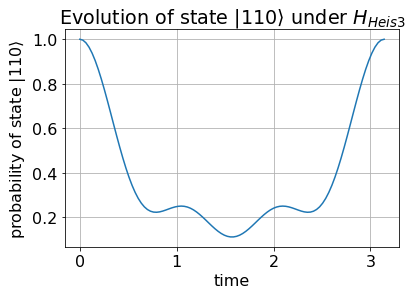

In [16]:
# Define array of time points
ts = np.linspace(0, np.pi, 100)

# Define initial state |110>
initial_state = One^One^Zero

# Compute probability of remaining in |110> state over the array of time points
 # ~initial_state gives the bra of the initial state (<110|)
 # @ is short hand for matrix multiplication
 # U_heis3(t) is the unitary time evolution at time t
 # t needs to be wrapped with float(t) to avoid a bug
 # (...).eval() returns the inner product <110|U_heis3(t)|110>
 #  np.abs(...)**2 is the modulus squared of the innner product which is the expectation value, or probability, of remaining in |110>
probs_110 = [np.abs((~initial_state @ U_heis3(float(t)) @ initial_state).eval())**2 for t in ts]

# Plot evolution of |110>
plt.plot(ts, probs_110)
plt.xlabel('time')
plt.ylabel(r'probability of state $|110\rangle$')
plt.title(r'Evolution of state $|110\rangle$ under $H_{Heis3}$')
plt.grid()
plt.show()

# Run on the Real device

In [17]:
# Importing standard Qiskit modules
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter

# Import state tomography modules
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

# Qiskit Pulse imports
import qiskit.pulse
from qiskit import pulse
from qiskit.pulse import library

from qiskit import *
from qiskit.pulse import Play, Schedule, DriveChannel, ControlChannel, Waveform, ShiftPhase
from qiskit.pulse.library import drag, GaussianSquare, Drag

from scipy.special import erf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
# load IBMQ Account data
IBMQ.save_account('',overwrite=True )
IBMQ.load_account()

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
#provider = IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:

provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')

backend  = provider.get_backend('ibmq_jakarta')

properties = backend.properties()

In [ ]:
# The PassManager helps decide how a circuit should be optimized
# (https://qiskit.org/documentation/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.html)
from qiskit.transpiler import PassManager

# This function will pull pulse-level calibration values to build RZX gates and tell the PassManager to leave RZX gates alone
from qiskit.transpiler.passes import RZXCalibrationBuilderNoEcho

In [ ]:
import h5py 
f_ansatz= h5py.File('ansatz.h5', 'r') # open h5 file open h5 file

## Rzz gate using qiskit's non echo Rzx

In [ ]:
def rzz_qiskit(qc,angle,q1,q0): # Using non-echo Rzx gate to create Rzz gate 
    qc.ry(-np.pi/2,q0)
    qc.rzx(angle/2, q1, q0) # non-echo Rzx gate
    qc.x(q1) # X \pi echo pulse
    qc.rzx(-angle/2, q1, q0) # non-echo Rzx gate
    qc.x(q1)
    qc.ry(np.pi/2,q0)

## Setup the Quantum Circuits

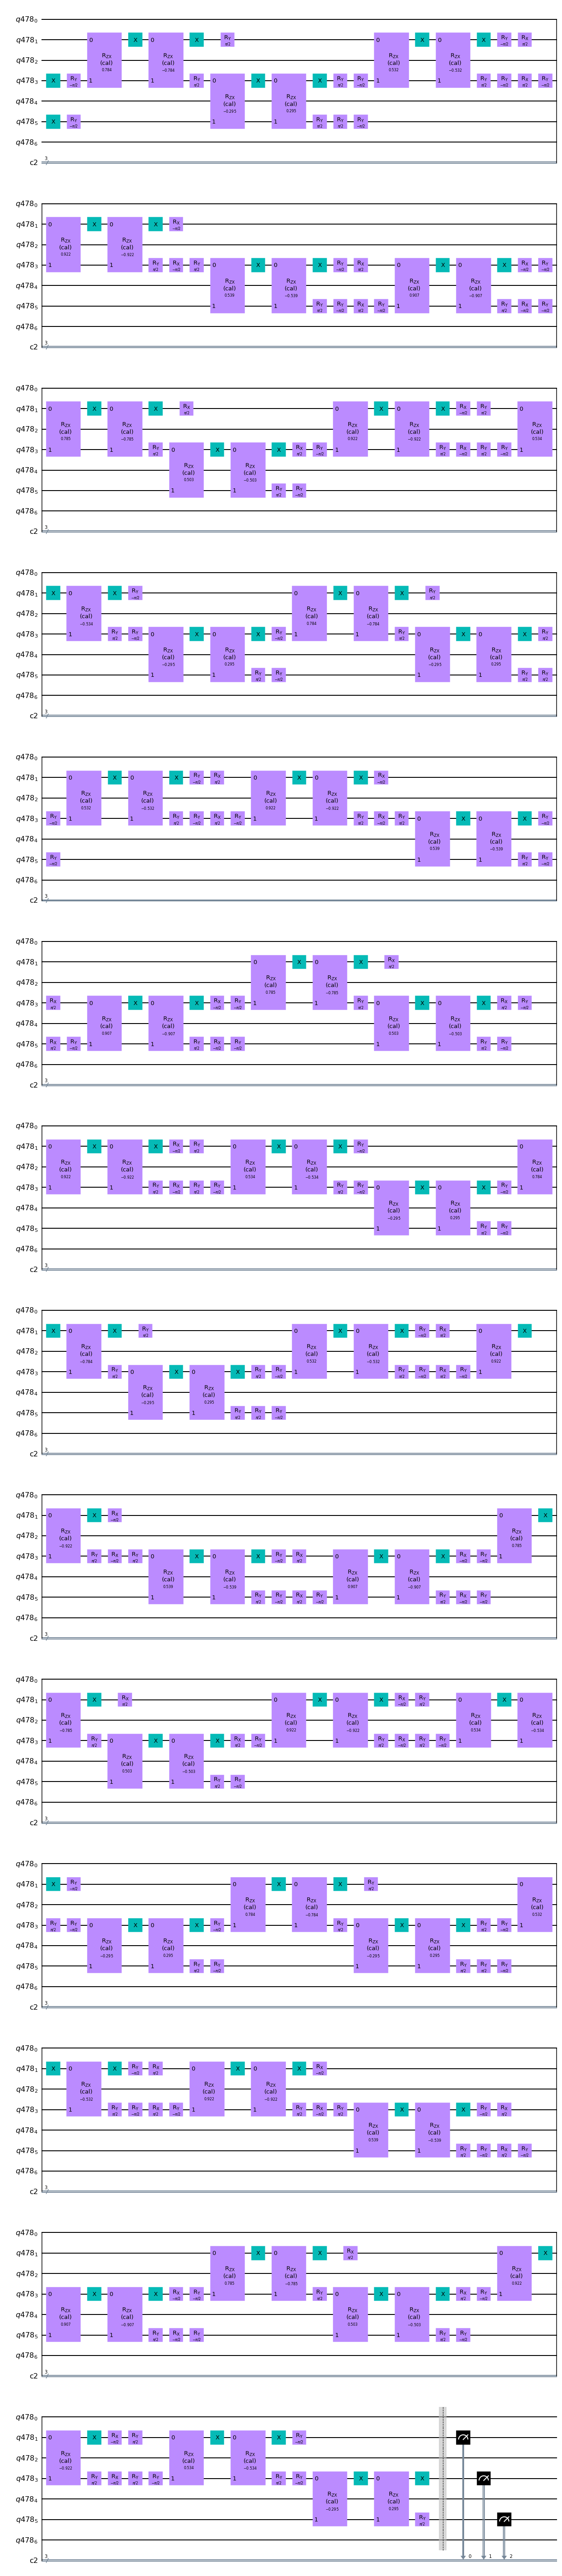

In [ ]:
target_time = np.pi 

target_t=np.pi/4 # the evolution time we want to get 
f = open(params_file, "r") # open the variational parameters file
num_string = f.readline()
pi_closer = 0
del_num = 1000
while num_string != '': # find out variational parameters when t=target_t
    num = num_string.split()
    time = float(num[0])
    if min(del_num,np.abs(time-target_t))==del_num:
        pass
    else:
        del_num=np.abs(time-target_t)
        pi_closer=time
        params=num[1:]
    num_string = f.readline()


# Initialize quantum circuit for 3 qubits
qr = QuantumRegister(7)
qc = QuantumCircuit(qr)

# Prepare initial state (remember we are only evolving 3 of the 7 qubits on jakarta qubits (q_5, q_3, q_1) corresponding to the state |110>)
qc.x([3,5])  # DO NOT MODIFY (|q_5,q_3,q_1> = |110>)

qlst=[1,3,5]

q0=qlst[0]

q1=qlst[1]

q2=qlst[2]

for _ in range(4): # Repeat 4 times which satisfies the rule 4 trotter steps
    for i,op in enumerate(ans._ansatz[1]):
        if op[1]==3:
          # op[1]=3: means Rzz gate
            rzz_qiskit(qc,float(params[i]),qlst[op[0]],qlst[op[2]])
        elif op[1]==2:
          # op[1]=2: means Ryy gate
            qc.rx(np.pi/2,[qlst[op[0]],qlst[op[2]]])
            rzz_qiskit(qc,float(params[i]),qlst[op[0]],qlst[op[2]])
            qc.rx(-np.pi/2,[qlst[op[0]],qlst[op[2]]])
        elif op[1]==1:
          # # op[1]=1: means Rxx gate
            qc.ry(np.pi/2,[qlst[op[0]],qlst[op[2]]])
            rzz_qiskit(qc,float(params[i]),qlst[op[0]],qlst[op[2]])
            qc.ry(-np.pi/2,[qlst[op[0]],qlst[op[2]]])
            

# Evaluate simulation at target_time (t=pi) meaning each trotter step evolves pi/trotter_steps in time
#qc = qc.bind_parameters({t: target_time/trotter_steps})

# Generate state tomography circuits to evaluate fidelity of simulation
st_qcs = state_tomography_circuits(qc, [qr[q0], qr[q1], qr[q2]])

pm = PassManager([RZXCalibrationBuilderNoEcho(backend)])
st_qcs_pulse_efficient = pm.run(st_qcs)
st_qcs_pulse_efficient[-1].draw('mpl') # optimized the pulse sequence


## Dynamical decoupling

In [ ]:
def DD_circuit_qiskit_pulse(circuit, backend, qubits_list, initial_layout = None, name=False):
    """

    Dynamical decoupling X_\pi-X_-\pi 


    circuit: qiskit circuit

    backend: ibm device

    qubits_list: the qubit list used to run 

    name: 'the circuit name'

    """

    if initial_layout:

        circuit = transpile(circuit, backend, scheduling_method='asap',initial_layout =init_layout)

    else:

        circuit = transpile(circuit, backend, scheduling_method='asap')

    if name:

        DD_cir = QuantumCircuit(*circuit.qregs,*circuit.cregs,name=circuit.name)

    else:

        DD_cir = QuantumCircuit(*circuit.qregs,*circuit.cregs)

    for operation in circuit[:]:

        if type(operation[0])==qiskit.circuit.delay.Delay:

            if  operation[0].duration >= 400:

                q_index = operation[1][0].index

                if q_index in qubits_list:

                    t=(operation[0].duration-320)//4 

                    t = math.ceil((t)/16)*16 # must be the multiple of 16

                    DD_cir.delay(t,[q_index],'dt')

                    DD_cir.x(q_index) # X_\pi

                    DD_cir.delay(2*t,[q_index],'dt')

                    DD_cir.z(q_index) # Z gate won't contribute time in ibm device

                    DD_cir.x(q_index) # X_-\pi

                    DD_cir.z(q_index) # Z gate won't contribute time in ibm device

                else:

                    DD_cir.data.append(operation)

            else:

                DD_cir.data.append(operation)

        else:

            DD_cir.data.append(operation)

    pm = PassManager([RZXCalibrationBuilderNoEcho(backend)])
    DD_cir_pulse_efficient = pm.run(DD_cir)

    return DD_cir_pulse_efficient

In [ ]:
from qiskit import *

In [ ]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [ ]:
qubits_list = [1,3,5]

cirs=[]

# create the circuits w/ dynamical decoupling.
for i in range(len(st_qcs)):

    cir_pulse_efficient=DD_circuit_qiskit_pulse(st_qcs_pulse_efficient[i], backend, qubits_list, name=True )

    cirs.append(cir_pulse_efficient)

## Readout Error Mitigation 

In [ ]:
# Using complete readout error mitigation
qubits_list = [q0,q1,q2]

shots=8192

qr = QuantumRegister(len(qubits_list),'q')

meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

In [ ]:
# Execute the readout error mitigation circuits first
init_layout = {}

for i,j in enumerate(qubits_list):

    init_layout[qr[i]] = j

cal_results = execute(meas_calibs, backend, shots=shots, initial_layout=init_layout)

print('Job ID', cal_results.job_id())

Job ID 624cdbe0aacb9bea725f4128


In [ ]:
shots = 8192
reps =4
#backend = sim_noisy_jakarta
# reps = 8
backend = backend #jakarta

jobs = []
for _ in range(reps):
    # execute state tomography circuits
    job = execute(cirs, backend, shots=shots)

    print('Job ID', job.job_id())
    jobs.append(job)

Job ID 624cdbe6aacb9b0bb15f4129
Job ID 624cdbeb4b515275f37c5db0
Job ID 624cdbf1d72033ca6d67cb5a
Job ID 624cdbf7d720338d8867cb5b


In [ ]:
for job in jobs:
    job_monitor(job)
    try:
        if job.error_message() is not None:
            print(job.error_message())
    except:
        pass

Job Status: job is queued (501)

## Job Retrieve

In [ ]:
# The history result


# Readout error mitigation result
cal_results=backend.retrieve_job('624cdbe0aacb9bea725f4128')

# State tomography result
ids=['624cdbe6aacb9b0bb15f4129','624cdbeb4b515275f37c5db0','624cdbf1d72033ca6d67cb5a','624cdbf7d720338d8867cb5b']
jobs=[]
for id in ids:
    jobs.append(backend.retrieve_job(id))

## Result

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results.result(), state_labels)

meas_filter = meas_fitter.filter

In [ ]:
# Compute the state tomography based on the st_qcs quantum circuits and the results from those ciricuits
def state_tomo(result, st_qcs): #, time):
    # The expected final state; necessary to determine state tomography fidelity
    target_state = (One^One^Zero).to_matrix()  # DO NOT MODIFY (|q_5,q_3,q_1> = |110>)
    # Fit state tomography results
    initial_state = One^One^Zero

    #target_state = (U_heis3(float(time)) @ initial_state).eval().to_matrix()

    mit_result = meas_fitter.filter.apply(result)

    tomo_fitter = StateTomographyFitter(mit_result, st_qcs)

    rho_fit = tomo_fitter.fit(method='lstsq')
    # Compute fidelity
    fid = state_fidelity(rho_fit, target_state)
    return fid

# Compute tomography fidelities for each repetition

fids = []
for job in jobs:
    fid = state_tomo(job.result(), st_qcs)
    fids.append(fid)
    
print('state tomography fidelity = {:.4f} \u00B1 {:.4f}'.format(np.mean(fids), np.std(fids)))

state tomography fidelity = 0.7044 ± 0.0084


In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table